<a href="https://colab.research.google.com/github/uomodellamansarda/DisneyMoviesAnalysis/blob/main/DisneyCharAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Disney data compiled by <a href="https://data.world/kgarrett/disney-character-success-00-16">Kelly Garrett</a>. The data contains 579 Disney movies with six features: movie title, release date, genre, MPAA rating, total gross, and inflation-adjusted gross. </p>

In [72]:
#Url for the dataset
url="https://raw.githubusercontent.com/uomodellamansarda/DisneyMoviesAnalysis/main/disney_movies_total_gross.csv"
#importing all the libraries we are going to use
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt 
#removing scientific notation
np.set_printoptions(suppress=True)
pd.options.display.float_format = '{:20,.2f}'.format
#creating the DataFrame 
df=pd.read_csv(url)
print(df.info())
#converting the release date to datetime
df['release_date'] = df['release_date'].apply(pd.to_datetime)
#sorting the movies by Revenues
df=df.sort_values(by="inflation_adjusted_gross",ascending=False)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB
None


,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515


In [73]:
# We get the year and create a specific column 
df['release_year'] = pd.DatetimeIndex(df['release_date']).year
pd.options.display.float_format = '{:20,.2f}'.format
#It's interesting to group the movies by genre and release year
#and calculate the mean 
df_grouped = df.groupby(['genre','release_year']).mean()
df_genre = df.groupby(['genre']).mean()
df_genre_reset=df_genre.reset_index()
print("Genre Info: \n",df_genre)
print("Genre Reset Info: \n",df_genre_reset)
# We convert the GroupBy object to a DataFrame
genre_yearly = df_grouped.reset_index()

# Inspecting genre_yearly 
genre_yearly.head(10)
print(genre_yearly.info())
print(df.info())

Genre Info: 
                              total_gross  ...         release_year
genre                                     ...                     
Action                    104,614,082.05  ...             1,999.42
Adventure                 127,047,050.02  ...             2,001.43
Black Comedy               32,514,404.00  ...             1,998.67
Comedy                     44,613,294.93  ...             1,996.01
Concert/Performance        51,728,233.00  ...             2,008.50
Documentary                11,292,851.19  ...             2,008.94
Drama                      36,026,078.68  ...             1,997.57
Horror                     14,511,478.67  ...             1,997.17
Musical                    72,330,259.69  ...             1,984.31
Romantic Comedy            50,095,950.22  ...             1,998.74
Thriller/Suspense          58,616,938.29  ...             1,999.96
Western                    51,287,351.29  ...             2,001.71

[12 rows x 3 columns]
Genre Reset Info: 
      

## Visualize the genre popularity trend
<p>We will make a plot out of these means of groups to better see how box office revenues have changed over time.</p>

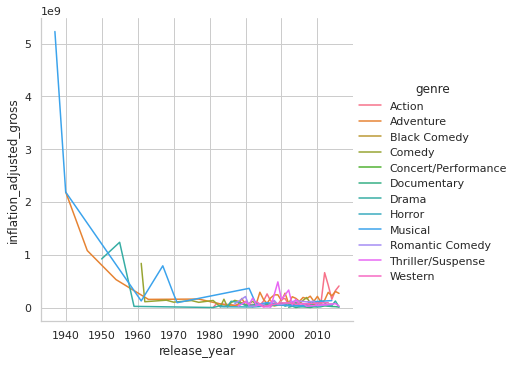

In [74]:
sns.relplot(data=genre_yearly,x='release_year',y='inflation_adjusted_gross',kind='line',hue='genre')
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

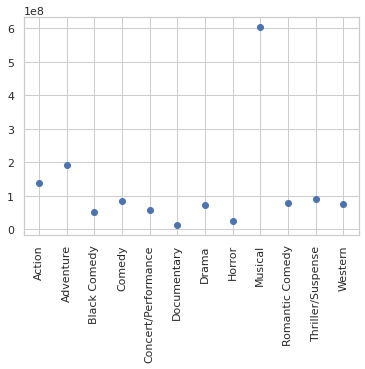

In [75]:
plt.scatter(df_genre_reset['genre'],df_genre_reset['inflation_adjusted_gross'])
plt.xticks(rotation='vertical')
plt.show()

## Data transformation
<p>The line plot supports our belief that some genres are growing faster in popularity than others. For Disney movies, Action and Adventure genres are growing the fastest. Next, we will build a linear regression model to understand the relationship between genre and box office gross. </p>
<p>Since linear regression requires numerical variables and the genre variable is a categorical variable, we'll use a technique called one-hot encoding to convert the categorical variables to numerical. This technique transforms each category value into a new column and assigns a 1 or 0 to the column. </p>
<p>For this dataset, there will be 11 dummy variables, one for each genre except the action genre which we will use as a baseline. For example, if a movie is an adventure movie, like The Lion King, the adventure variable will be 1 and other dummy variables will be 0. Since the action genre is our baseline, if a movie is an action movie, such as The Avengers, all dummy variables will be 0.</p>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 29
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Adventure            579 non-null    uint8
 1   Black Comedy         579 non-null    uint8
 2   Comedy               579 non-null    uint8
 3   Concert/Performance  579 non-null    uint8
 4   Documentary          579 non-null    uint8
 5   Drama                579 non-null    uint8
 6   Horror               579 non-null    uint8
 7   Musical              579 non-null    uint8
 8   Romantic Comedy      579 non-null    uint8
 9   Thriller/Suspense    579 non-null    uint8
 10  Western              579 non-null    uint8
dtypes: uint8(11)
memory usage: 10.7 KB
0      5228953251
1      2188229052
2      2187090808
8      1362870985
6      1236035515
          ...    
511          2984
27              0
20              0
355             0
29              0
Name: inflation_adjusted_gross, Le

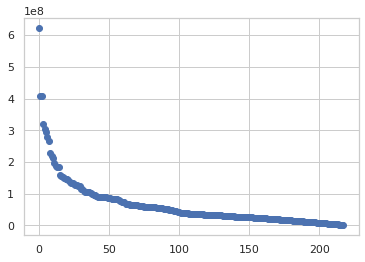

In [76]:
# Convert genre variable to dummy variables 
genre_dummies = pd.get_dummies(df['genre'],drop_first=True)

#Inspect genre_dummies
genre_dummies.head()
genre_dummies.info()
print(df["inflation_adjusted_gross"])
x1=np.arange(0,len(df_grouped))
y=df_grouped["total_gross"].sort_values(ascending=False)
print(len(x1))
print(len(y))
plt.scatter(x1,y)
plt.show()

## The genre effect
<p>Now that we have dummy variables, we can build a linear regression model to predict the adjusted gross using these dummy variables.</p>
<p>From the regression model, we can check the effect of each genre by looking at its coefficient given in units of box office gross dollars. We will focus on the impact of action and adventure genres here. (Note that the intercept and the first coefficient values represent the effect of action and adventure genres respectively). We expect that movies like the Lion King or Star Wars would perform better for box office.</p>

In [77]:
# Import LinearRegression
# Build a linear regression model
regr = LinearRegression()

# Fit regr to the dataset
regr.fit(genre_dummies,df['inflation_adjusted_gross'])

# Get estimated intercept and coefficient values 
action =  regr.intercept_
adventure = regr.coef_[[0]][0]

# Inspect the estimated intercept and coefficient values 
print((action, adventure))

(102921757.36842026, 87475654.70909917)


## Confidence intervals for regression parameters  (i)
<p>Next, we will compute 95% confidence intervals for the intercept and coefficients. The 95% confidence intervals for the intercept  <b><i>a</i></b> and coefficient <b><i>b<sub>i</sub></i></b> 

Note: Confidence Interval is a type of estimate computed from the statistics of the observed data. 
This proposes a range of plausible values for an unknown parameters. 

Neyman, who introduced the confidence interval, a 95% confidence level does not mean that for a given realized interval there is a 95% probability that the population parameter lies within the interval. 
<p>
According to the frequentistic interpretation, once an interval is calculated this interval either covers the parameter value or it does not
</p> 
<i><b>The 95% probability relates to the reliability of the estimation procedure </b> </i>

<p>We will calculate the confidence intervals using the pairs bootstrap method. </p>

In [78]:

# Create an array of indices to sample from 
inds = np.arange(0,len(df['genre']))

# Initialize 500 replicate arrays
size = 500
bs_action_reps =  np.empty(size)
bs_adventure_reps =  np.empty(size)

## Confidence intervals for regression parameters  (ii)
<p>After the initialization, we will perform pair bootstrap estimates for the regression parameters. Note that we will draw a sample from a set of (genre, adjusted gross) data where the genre is the original genre variable. We will perform one-hot encoding after that. </p>

In [79]:
# Generate replicates  
print(df.info())

for i in range(size):
    
    # Resample the indices 
    bs_inds = np.random.choice(inds,size=len(inds))
    
    # Get the sampled genre and sampled adjusted gross
    bs_genre = df['genre'][bs_inds] 
    bs_gross = df['inflation_adjusted_gross'][bs_inds]
    
    # Convert sampled genre to dummy variables
    bs_dummies = pd.get_dummies(bs_genre,drop_first=True)
   
    # Build and fit a regression model 
    regr = LinearRegression().fit(bs_dummies, bs_gross)
    
    # Compute replicates of estimated intercept and coefficient
    bs_action_reps[i] = regr.intercept_
    bs_adventure_reps[i] = regr.coef_[[0]][0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 29
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   movie_title               579 non-null    object        
 1   release_date              579 non-null    datetime64[ns]
 2   genre                     562 non-null    object        
 3   mpaa_rating               523 non-null    object        
 4   total_gross               579 non-null    int64         
 5   inflation_adjusted_gross  579 non-null    int64         
 6   release_year              579 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 36.2+ KB
None


## Confidence intervals for regression parameters (iii)
<p>Finally, we compute 95% confidence intervals for the intercept and coefficient and examine if they exclude 0. If one of them (or both) does, then it is unlikely that the value is 0 and we can conclude that there is a significant relationship between that genre and the adjusted gross. </p>

500
500
[7.35974921e+07 1.39189551e+08]
[3.44213313e+07 1.47099930e+08]


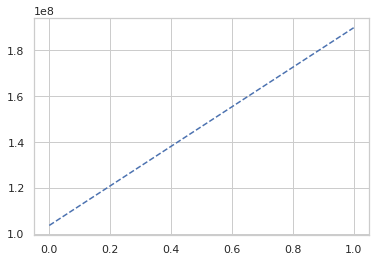

In [80]:
# Compute 95% confidence intervals for intercept and coefficient values
confidence_interval_action = np.percentile(bs_action_reps,[2.5,97.5])
confidence_interval_adventure = np.percentile(bs_adventure_reps,[2.5,97.5])
print(len(bs_action_reps))
print(len(bs_adventure_reps))    
bs_dict={"intercept":[bs_action_reps], "coefficient":[bs_adventure_reps]}
bs_df=pd.DataFrame(bs_dict)
# sns.lmplot(x='Net Sales', y='Wastage and Samp', data=np_scaled)
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
abline(np.mean(bs_adventure_reps),np.mean(bs_action_reps))
# Inspect the confidence intervals

print(confidence_interval_action)
print(confidence_interval_adventure)

## Should Disney make more action and adventure movies?
<p>The confidence intervals from the bootstrap method for the intercept and coefficient do not contain the value zero, as we have already seen that lower and upper bounds of both confidence intervals are positive. These tell us that it is likely that the adjusted gross is significantly correlated with the action and adventure genres. </p>
<p>From the results of the bootstrap analysis and the trend plot we have done earlier, we could say that Disney movies with plots that fit into the action and adventure genre, according to our data, tend to do better in terms of adjusted gross than other genres. So we could expect more Marvel, Star Wars, and live-action movies in the upcoming years!</p>